In [1]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from datasets import load_from_disk
import torch


In [27]:
from datasets import load_dataset
dataset = load_dataset('multi_news', split='train').shard(num_shards=40, index=0)

In [2]:
shard0 = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_pegasus/shard_0")
shard1 = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_pegasus/shard_1")
shard2 = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_pegasus/shard_2")
shard3 = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_pegasus/shard_3")
shard4 = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_pegasus/shard_4")

In [14]:
model_name = "google/pegasus-multi_news"
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)

In [15]:
def generate_summary(document):
    result = []
    for text in document['document']:
        batch = tokenizer(''.join(text), truncation=True, padding="longest", return_tensors="pt").to(device)
        translated = model.generate(**batch)
        result.extend(tokenizer.batch_decode(translated, skip_special_tokens=True))
    document['pred'] = result
    return document

In [16]:
result = shard.select(range(3)).map(generate_summary)

  0%|          | 0/3 [00:00<?, ?ex/s]

/ext3/miniconda3/lib/python3.9/site-packages/transformers/generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 256 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [22]:
result['document'][0][1]

["Polls and race analysts suggest that only three of tonight's contests are considered competitive, all in states where incumbent Democratic governors aren't running again: Montana, New Hampshire and Washington.",
 'Three Republican governors, including Rick Scott of Florida and Scott Walker of Wisconsin, rejected a share of the money citing debt and deficit concerns.',
 "State-By-State View \n \n North Carolina: One-term incumbent Democratic Gov. Beverly Perdue, the first woman to hold the state's top office, announced in January that she would not seek re-election after polls showed her with high disapproval ratings and trailing Republican candidate Pat McCrory.",
 'McCrory lost a close race to Perdue in 2008, when then-presidential candidate Barack Obama became the first Democrat to win North Carolina in more than three decades.',
 'New Hampshire: Former Democratic state Sen. Maggie Hassan has also promised a continuation of the policies of her predecessor, retiring Democratic Gov. 

In [23]:
result[0]['pred'][1]

"– It's Election Day, which means it's time for you to chime in with your thoughts on who's going to be the next governor of Montana, New Hampshire, or Washington. Here's what you need to know: It's a dead heat: Democrat Jay Inslee and Tea Party favorite Ovide Lamontagne are in a dead heat in the race for governor of Washington, the state has been in Democratic hands for 32 years. It's a close race: Former Democratic state Sen. Maggie Hassan has promised a continuation of the policies of her predecessor, retiring Democratic Gov. John Lynch. Her opponent is lawyer Ovide Lamontagne, a Tea Party conservative who ran unsuccessfully for governor in 1996 and for the US Senate in 2010. Polls and race analysts suggest that only three of tonight's contests are considered competitive, all in states where incumbent Democratic governors aren't running again: Montana, New Hampshire, and Washington. Three Republican governors, including Rick Scott of Florida and Scott Walker of Wisconsin, rejected a

In [19]:
result[0]['summary']

'– It\'s a race for the governor\'s mansion in 11 states today, and the GOP could end the night at the helm of more than two-thirds of the 50 states. The GOP currently controls 29 of the country\'s top state offices; it\'s expected to keep the three Republican ones that are up for grabs (Utah, North Dakota, and Indiana), and wrest North Carolina from the Dems. That brings its toll to 30, with the potential to take three more, reports NPR. Races in Montana, New Hampshire, and Washington are still too close to call, and in all three, Democrat incumbents aren\'t seeking reelection. The results could have a big impact on health care, since a Supreme Court ruling grants states the ability to opt out of ObamaCare\'s Medicaid expansion. "A Romney victory would dramatically empower Republican governors," said one analyst. Click for NPR\'s state-by-state breakdown of what could happen.'

In [11]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)

In [3]:
from datasets import load_from_disk
pegasus_result= load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/pegasus_multi_news/shard_0")

In [43]:
# topic 1
pegasus_result['document'][0][0]

['Just look at what happened when the Obama administration in 2010 offered federal stimulus money to states to begin building a high-speed rail network.',
 'Just look at what happened when the Obama administration in 2010 offered federal stimulus money to states to begin building a high-speed rail network.']

In [49]:
# topic 2
pegasus_result['document'][0][2]

["GOP Eyes Gains As Voters In 11 States Pick Governors \n \n Enlarge this image toggle caption Jim Cole/AP Jim Cole/AP \n \n Voters in 11 states will pick their governors tonight, and Republicans appear on track to increase their numbers by at least one, with the potential to extend their hold to more than two-thirds of the nation's top state offices.",
 'Eight of the gubernatorial seats up for grabs are now held by Democrats; three are in Republican hands.',
 'While those state races remain too close to call, Republicans are expected to wrest the North Carolina governorship from Democratic control, and to easily win GOP-held seats in Utah, North Dakota and Indiana.',
 'Democrats are likely to hold on to their seats in West Virginia and Missouri, and are expected to notch safe wins in races for seats they hold in Vermont and Delaware.',
 'Jack Dalrymple in North Dakota and Gary Herbert in Utah, and GOP Rep. Mike Pence in Indiana are expected to win.',
 'Democrats are also hoping to hol

In [46]:
pegasus_result['pred'][0]

["– It's not the kind of headline you'd expect to read from the Wall Street Journal, but that's exactly what's happened in the case of the San Francisco 49ers. The team's starting quarterback, 49ers tight end Vernon Davis, is out with a season-ending knee injury suffered in a game against the Golden State Warriors on Sunday. Davis, who was injured in the first half of the game, is expected to miss the rest of the season. The team says in a statement that the injury is not life-threatening. Davis was carted off the field on a stretcher and taken to a local hospital. He's expected to be in the hospital for at least a week.",
 "– It's Election Day, which means it's time for you to chime in with your thoughts on who's going to be the next governor of Montana, New Hampshire, or Washington. Here's what you need to know: It's a dead heat: Democrat Jay Inslee and Tea Party favorite Ovide Lamontagne are in a dead heat in the race for governor of Washington, the state has been in Democratic hand

In [174]:
pegasus_result['summary'][7]

"– Apparently there are places even South Park fears to tread. After getting a death threat from the jihadist website RevolutionMuslim.com, the show pulled the prophet Mohammed out of this week's episode, bleeping out all mention of his name, putting “censored” banners over parts of the episode and, where necessary, replacing him with Santa Claus in a bear suit, the Huffington Post reports. Here's the deal: last week's episode (which you can see a clip of here) mocked the taboo against showing the prophet Mohammed, having him show up first hidden inside a U-Haul, and then inside a bear costume. This week's episode was to continue that story. It's unclear whether the extra censorship is intended to appease the irony-challenged folks at RevolutionMuslim or mock them. South Park, incidentally, has tackled the issue before, and even depicted Mohammed on screen once with impunity."

In [40]:
batch = tokenizer(dataset[0]['document'], truncation=True, padding="longest", return_tensors="pt").to(device)
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)

In [36]:
tgt_text

['– Two of the three suicide bombers who killed at least 44 people and wounded more than 300 in an attack Tuesday at Istanbul\'s airport have been identified, according to Turkey\'s state news agency. Vadim Osmanov and Rakim Bulgarov, both from Uzbekistan, have been identified as the attackers, Anadolu Agency said, without naming their nationalities. Vadim Osmanov was born in Kyrgyzstan, while Bulgarov is from Uzbekistan, CNN reports. They reportedly entered Turkey a month ago from Syria\'s ISIS stronghold of Raqqa. On Thursday, US Rep. Michael McCaul identified the organizer of the attack as Akhmed Chatayev, a Chechen who is "probably the No. 1 enemy in the Northern Caucasus region of Russia," he said. "He\'s traveled to Syria on many occasions and became one of the top lieutenants for the minister of war for ISIS operations." McCaul said Chatayev coordinated the attack with the three suicide bombers, who were armed with a bomb, a gun, and a bomb-making device. The chairman of the Hou

In [17]:
scorer.score(''.join(pegasus_result['pred'][0]),pegasus_result['summary'][0])

{'rouge1': Score(precision=0.475, recall=0.3140495867768595, fmeasure=0.3781094527363184),
 'rouge2': Score(precision=0.17721518987341772, recall=0.11666666666666667, fmeasure=0.14070351758793972),
 'rougeL': Score(precision=0.3375, recall=0.2231404958677686, fmeasure=0.26865671641791045)}

In [6]:
from datasets import concatenate_datasets, load_dataset
shard_0 = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_pegasus/shard_0")
shard_1 = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_pegasus/shard_1")
shard_2 = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_pegasus/shard_2")
shard_3 = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_pegasus/shard_3")
shard_4 = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_pegasus/shard_4")

In [8]:
pegasus_result = concatenate_datasets([shard_0,shard_1,shard_2,shard_3,shard_4])

In [163]:
def get_rouge(document):
    len_cutoff = 3
    score_cutoff = 0.01
    pred = []
    for i in range(len(document['pred'])):
        if len(document['clustered_scores'][i]) > len_cutoff:
            if np.quantile(document['clustered_scores'][i], 0.75) > score_cutoff:
                pred.append(document['pred'][i])
    pred = ''.join(pred)
    summary = document['summary']
    score = scorer.score(pred,summary)
    document['rouge1'] = score['rouge1'][2]
    document['rouge2'] = score['rouge2'][2]
    document['rougeL'] = score['rougeL'][2]
    document['output'] = pred
    
    return document
    

In [188]:
get_rouge(pegasus_result[57])['output']

'– The "nightmare nanny" who won\'t leave a California family\'s home has agreed to move out by July 4, the Bracamontes tell People. "She wrote a [email] stating what she wants to do," says Marcella Bracamonte. "She would like to move out but because of the hot weather that\'s going to happen soon." The only hitch: The Bracamontes were scheduled to go out of town for a family wedding on July 2. "I feel like it\'s a trap," says Bracamonte. "I feel like she knows that I\'m going to be gone and that she wants to lock me out of my home." The Bracamontes hired 64-year-old Diane Stretton via Craigslist, offering her room and board for taking care of their three children, ages 11, 4, and 16 months. After the first few months, Stretton stopped working and refused to leave her room. The Bracamontes fired her on June 6, and asked Stretton to sign a letter giving her 30 days to leave, but Stretton threatened to sue the family for elder abuse and improper firing, CBS Los Angeles reports. The Braca

In [187]:
pegasus_result[7]['summary']

"– Apparently there are places even South Park fears to tread. After getting a death threat from the jihadist website RevolutionMuslim.com, the show pulled the prophet Mohammed out of this week's episode, bleeping out all mention of his name, putting “censored” banners over parts of the episode and, where necessary, replacing him with Santa Claus in a bear suit, the Huffington Post reports. Here's the deal: last week's episode (which you can see a clip of here) mocked the taboo against showing the prophet Mohammed, having him show up first hidden inside a U-Haul, and then inside a bear costume. This week's episode was to continue that story. It's unclear whether the extra censorship is intended to appease the irony-challenged folks at RevolutionMuslim or mock them. South Park, incidentally, has tackled the issue before, and even depicted Mohammed on screen once with impunity."

In [165]:
pegasus_rouge = pegasus_result.map(get_rouge,num_proc = 8)

#2:   0%|          | 0/703 [00:00<?, ?ex/s]

#1:   0%|          | 0/703 [00:00<?, ?ex/s]

#0:   0%|          | 0/703 [00:00<?, ?ex/s]

#5:   0%|          | 0/703 [00:00<?, ?ex/s]

#4:   0%|          | 0/703 [00:00<?, ?ex/s]

#3:   0%|          | 0/703 [00:00<?, ?ex/s]

#7:   0%|          | 0/702 [00:00<?, ?ex/s]

#6:   0%|          | 0/702 [00:00<?, ?ex/s]

In [166]:
import numpy as np
print("rouge1: ", np.mean(pegasus_rouge['rouge1']))
print("rouge2: ", np.mean(pegasus_rouge['rouge2']))
print("rougeL: ", np.mean(pegasus_rouge['rougeL']))

rouge1:  0.42190564320207663
rouge2:  0.16324158862041507
rougeL:  0.19833580975640575


In [167]:
import matplotlib.pyplot as plt
def cluster_mean_score(document):
    l = []
    for c in document['clustered_scores']:
        l.append(np.mean(c))
    document['cluster_rouge'] = l
    
    return document

In [168]:
pegasus_rouge = pegasus_result.map(cluster_mean_score, num_proc = 8)

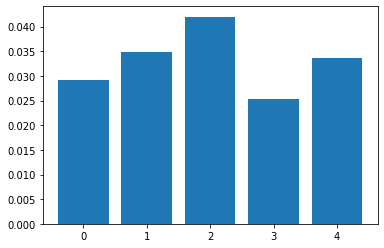

In [42]:
plt.bar(range(len(pegasus_rouge['cluster_rouge'][0])), pegasus_rouge['cluster_rouge'][0])
plt.show()

In [159]:
c_score = []
c_len = []
for row in pegasus_rouge['clustered_scores']:
    for c in row:
        c_score.append(np.mean(c))
        c_len.append(len(c))


Text(0.5, 1.0, 'cluster rouge score distribution')

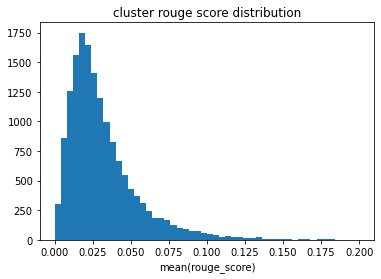

In [169]:
plt.hist(c_score,range = (0,0.2), bins = 50)
plt.xlabel("mean(rouge_score)")
plt.title("cluster rouge score distribution")

Text(0.5, 1.0, 'cluster size distribution')

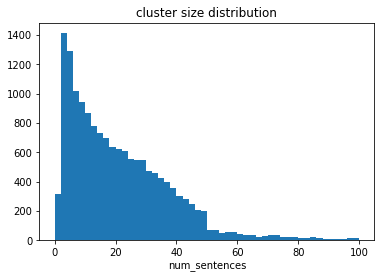

In [170]:
plt.hist(c_len,range = (0,100), bins = 50)
plt.xlabel("num_sentences")
plt.title("cluster size distribution")

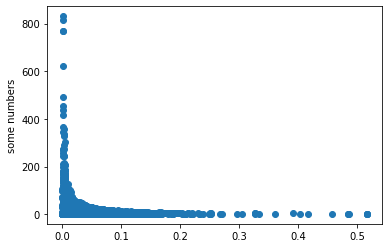

In [162]:
plt.scatter(c_score,c_len)
plt.ylabel('some numbers')
plt.show()